## Description

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

#### Variables definitions:
- user id
- REGION - the location of each client
- TENURE - duration in the network
- MONTANT - top-up amount
- FREQUENCE_RECH - number of times the customer refilled
- REVENUE - monthly income of each client
- ARPU_SEGMENT - income over 90 days / 3
- FREQUENCE - number of times the client has made an income
- DATA_VOLUME - number of connections
- ON_NET - inter expresso call
- ORANGE - call to orange
- TIGO - call to Tigo
- ZONE1 - call to zones1
- ZONE2 - call to zones2
- MRG - a client who is going
- REGULARITY - number of times the client is active for 90 days
- TOP_PACK	 - the most active packs
- FREQ_TOP_PACK- number of times the client  has activated the top pack packages
- CHURN - variable to predict - Target

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [164]:
data_train = pd.read_csv('Train.csv')

In [165]:
data_train.shape

(2154048, 19)

In [166]:
data_train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [167]:
data_train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [168]:
data_train.count()

user_id           2154048
REGION            1304749
TENURE            2154048
MONTANT           1397309
FREQUENCE_RECH    1397309
REVENUE           1428000
ARPU_SEGMENT      1428000
FREQUENCE         1428000
DATA_VOLUME       1093615
ON_NET            1367373
ORANGE            1258800
TIGO               864032
ZONE1              169721
ZONE2              136824
MRG               2154048
REGULARITY        2154048
TOP_PACK          1251454
FREQ_TOP_PACK     1251454
CHURN             2154048
dtype: int64

In [169]:
# Are there any samples with all features, filled with NaN?

col = ['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'TOP_PACK'] 

for i in col:
   if i == 'REGION':
     cond = data_train[i].isna()
     mask = data_train[cond]
   else:
     cond = mask[i].isna()
     mask = mask[cond]  

mask.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,NaN,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
17,0000a45ed15492427df603217166f1f813a2cc83,NaN,H 15-18 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1
22,0000b4af921db374095a9e7ab87ee314522e4fe4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
35,00012873b0a82e81b3155431769fa5ac0a8ac267,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1


In [170]:
mask.count()

user_id           417863
REGION                 0
TENURE            417863
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG               417863
REGULARITY        417863
TOP_PACK               0
FREQ_TOP_PACK          0
CHURN             417863
dtype: int64

In [171]:
# Does this users active or inactive? 

mask['CHURN'].value_counts()

1    261776
0    156087
Name: CHURN, dtype: int64

In [172]:
data_train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


### REGION

In [173]:
data_train['REGION'].unique()

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [174]:
data_train['REGION'].value_counts()

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

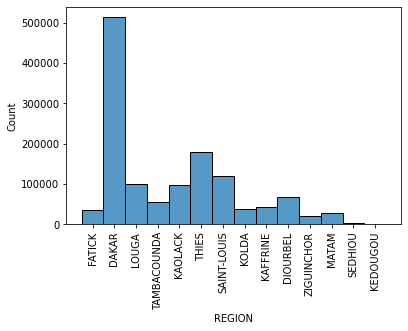

In [175]:
# What is the most frequent region?

region = data_train['REGION'].dropna()
sns.histplot(data=region)
plt.xticks(rotation=90)

### TENURE

In [176]:
data_train['TENURE'].value_counts()

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

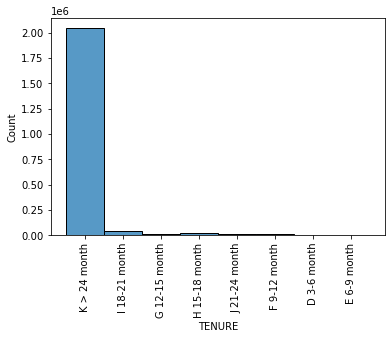

In [177]:
sns.histplot(data=data_train['TENURE'])
plt.xticks(rotation=90)

### MONTANT, FREQUENCE_RECH

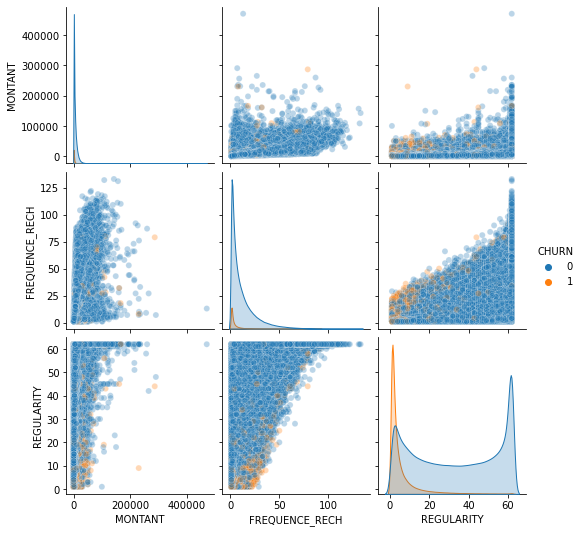

In [26]:
#sns.pairplot(data_train, 
             #vars = ['MONTANT', 'FREQUENCE_RECH', 'REGULARITY'],
             #hue = 'CHURN',
             #kind = 'scatter',
             #plot_kws=dict(alpha=0.3))

### REVENUE, ARPU_SEGMENT, FREQUENCE

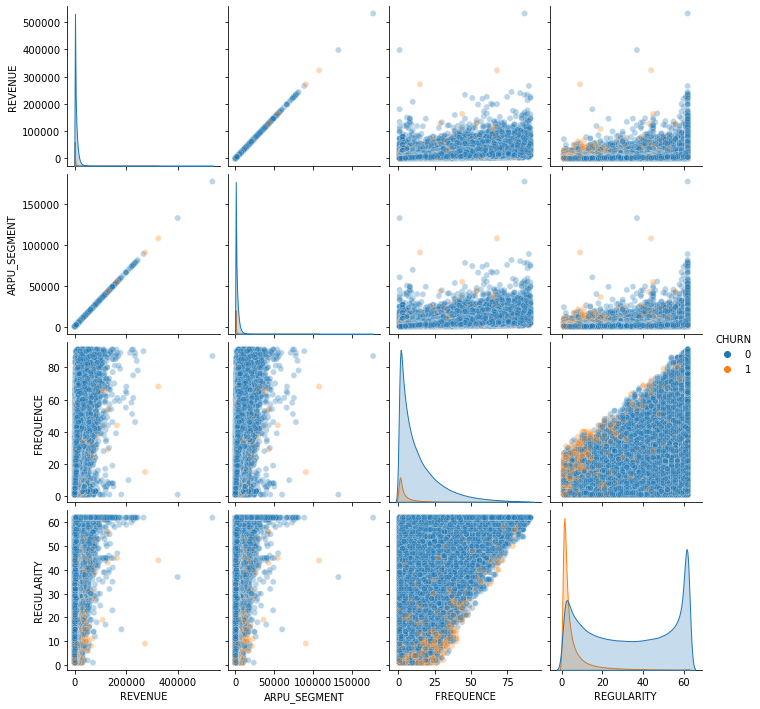

In [30]:
#sns.pairplot(data_train, 
             #vars = ['REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'REGULARITY'],
             #hue = 'CHURN',
             #kind = 'scatter',
             #plot_kws=dict(alpha=0.3))

### DATA_VOLUME

### MRG

In [178]:
print(data_train['MRG'].nunique())

1


In [179]:
# we can  drop MRG column both in train and test sets

data_train.drop(['MRG'], axis = 1, inplace=True)

### REGULARITY

<AxesSubplot:xlabel='REGULARITY', ylabel='Count'>

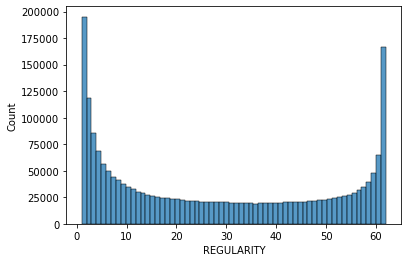

In [180]:
# What is the regularity distribution?

sns.histplot(data=data_train['REGULARITY'], bins=(data_train['REGULARITY'].max()))

In [181]:
# What is the mean regularity of those who became inactive?

data_train.groupby(['CHURN'])['REGULARITY'].mean()

CHURN
0    33.182215
1     5.777349
Name: REGULARITY, dtype: float64

In [182]:
# How often on average users with different favorite package use the service? 

pack_reg = data_train.groupby(['TOP_PACK'])['REGULARITY'].mean().sort_values(ascending = False)

pack_reg

TOP_PACK
301765007                       62.000000
Go-NetPro-4 Go                  62.000000
CVM_On-net 1300f=12500          61.666667
Postpaid FORFAIT 10H Package    61.000000
EVC_4900=12000F                 61.000000
                                  ...    
200=unlimited pilot auto         6.000000
Data_Mifi_10Go                   6.000000
Data:1000F=700MB,7d              5.000000
GPRS_PKG_5GO_ILLIMITE            3.000000
FIFA_TS_weekly                   3.000000
Name: REGULARITY, Length: 140, dtype: float64

In [183]:
pack_reg_Q2 = pack_reg.quantile(0.2)
pack_reg_Q4 = pack_reg.quantile(0.4)
pack_reg_Q6 = pack_reg.quantile(0.6)
pack_reg_Q8 = pack_reg.quantile(0.8)

print(pack_reg_Q1 , pack_reg_Q2, pack_reg_Q3, pack_reg_Q4, pack_reg_Q5, pack_reg_Q6, pack_reg_Q7, pack_reg_Q8, pack_reg_Q9)

13.860000000000001 24.866666666666667 30.963461538461537 35.340489044140995 38.754676559618886 40.52846051248953 42.256145428873985 46.61538461538462 52.724697696412896


In [184]:
df_pack_reg = pd.DataFrame(pack_reg)
df_pack_reg.reset_index()

,TOP_PACK,REGULARITY
0,301765007,62.000000
1,Go-NetPro-4 Go,62.000000
2,CVM_On-net 1300f=12500,61.666667
3,Postpaid FORFAIT 10H Package,61.000000
4,EVC_4900=12000F,61.000000
...,...,...
135,200=unlimited pilot auto,6.000000
136,Data_Mifi_10Go,6.000000
137,"Data:1000F=700MB,7d",5.000000
138,GPRS_PKG_5GO_ILLIMITE,3.000000


### TOP_PACK

In [185]:
data_train['TOP_PACK'].value_counts().nunique()

99

In [186]:
# TOP 20 packs
data_train['TOP_PACK'].value_counts().head(20)

All-net 500F=2000F;5d                        317802
On net 200F=Unlimited _call24H               152295
Data:490F=1GB,7d                             115180
Data: 100 F=40MB,24H                          84649
Mixt 250F=Unlimited_call24H                   67512
MIXT:500F= 2500F on net _2500F off net;2d     64412
Data:1000F=2GB,30d                            59770
All-net 500F =2000F_AllNet_Unlimited          46890
Jokko_Daily                                   45036
Data: 200 F=100MB,24H                         42841
IVR Echat_Daily_50F                           28658
On-net 500=4000,10d                           26733
On-net 500F_FNF;3d                            22332
Data:200F=Unlimited,24H                       22043
MIXT: 200mnoff net _unl on net _5Go;30d       19318
On-net 1000F=10MilF;10d                       18454
VAS(IVR_Radio_Daily)                          14686
Data:1000F=5GB,7d                             14629
Twter_U2opia_Daily                            12060
All-net 600F

In [187]:
# Users with which favorite packages became inactive?

data_train.groupby(['CHURN'])['TOP_PACK'].value_counts()

CHURN  TOP_PACK                                    
0      All-net 500F=2000F;5d                           307522
       On net 200F=Unlimited _call24H                  149405
       Data:490F=1GB,7d                                107901
       Data: 100 F=40MB,24H                             80732
       Mixt 250F=Unlimited_call24H                      64667
                                                        ...  
1      GPRS_3000Equal10GPORTAL                              1
       GPRS_PKG_5GO_ILLIMITE                                1
       MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t         1
       pack_chinguitel_24h                                  1
       pilot_offer7                                         1
Name: TOP_PACK, Length: 238, dtype: int64

In [188]:
frq_top_pack = data_train.groupby(['TOP_PACK'])['FREQ_TOP_PACK'].mean().sort_values(ascending = False)
df_frq_top_pack = pd.DataFrame(frq_top_pack.reset_index())
#df_frq_top_pack.reset_index()
df_frq_top_pack 

,TOP_PACK,FREQ_TOP_PACK
0,MROMO_TIMWES_OneDAY,42.800000
1,TelmunCRBT_daily,29.662500
2,CVM_200f=400MB,29.545455
3,Data:DailyCycle_Pilot_1.5GB,20.171934
4,"YMGX 100=1 hour FNF, 24H/1 month",19.446224
...,...,...
135,CVM_150F_unlimited,1.000000
136,FIFA_TS_monthly,1.000000
137,EVC_1Go,1.000000
138,Data_Mifi_20Go,1.000000


In [189]:
montant = data_train.groupby(['REGULARITY'])['MONTANT'].mean().sort_values(ascending = False)
df_montant = pd.DataFrame(montant.reset_index())
df_montant

,REGULARITY,MONTANT
0,62,14660.103388
1,61,10732.610134
2,60,9522.823747
3,59,8736.001261
4,58,8146.365698
...,...,...
57,5,1003.038040
58,4,977.684434
59,3,956.931832
60,2,883.332510


In [190]:
freq_rech = data_train.groupby(['REGULARITY'])['FREQUENCE_RECH'].mean().sort_values(ascending = False)
df_freq_rech = pd.DataFrame(freq_rech.reset_index())
df_freq_rech

,REGULARITY,FREQUENCE_RECH
0,62,27.511555
1,61,22.152134
2,60,20.091386
3,59,18.609853
4,58,17.576323
...,...,...
57,5,2.040219
58,4,1.943801
59,3,1.829849
60,2,1.763284


In [191]:
revenue = data_train.groupby(['REGULARITY'])['REVENUE'].mean().sort_values(ascending = False)
df_revenue = pd.DataFrame(revenue.reset_index())
df_revenue

,REGULARITY,REVENUE
0,62,14914.047483
1,61,10937.889595
2,60,9689.223840
3,59,8901.643947
4,58,8268.748142
...,...,...
57,5,875.500000
58,4,816.038352
59,3,776.042270
60,2,719.964275


In [192]:
arpu_segment = data_train.groupby(['REGULARITY'])['ARPU_SEGMENT'].mean().sort_values(ascending = False)
df_arpu_segment = pd.DataFrame(arpu_segment.reset_index())
df_arpu_segment

,REGULARITY,ARPU_SEGMENT
0,62,4971.349489
1,61,3645.964428
2,60,3229.740558
3,59,2967.218299
4,58,2756.250059
...,...,...
57,5,291.854241
58,4,272.036986
59,3,258.700675
60,2,240.002187


In [193]:
frequence = data_train.groupby(['REGULARITY'])['FREQUENCE'].mean().sort_values(ascending = False)
df_frequence = pd.DataFrame(frequence.reset_index())
df_frequence

,REGULARITY,FREQUENCE
0,62,32.253422
1,61,26.369121
2,60,24.128745
3,59,22.487730
4,58,21.347281
...,...,...
57,5,2.623964
58,4,2.484208
59,3,2.323625
60,2,2.189319


### Preparation of data

In [194]:
# Fill NA in REGION with most frequent one

data_train['REGION'] = np.where(data_train['REGION'].isna(), 'DAKAR', data_train['REGION'])

# Create groupby feature: mean regularity for the TOP_PACK

#data_train['pack_reg'] = data_train['TOP_PACK'].map(data_train.groupby(['TOP_PACK'])['REGULARITY'].mean())

In [195]:
# Transform TENURE column in binary one: 1 if duration >24 months, else 0

data_train['TENURE'] = np.where(data_train['TENURE'] == 'K > 24 month', 1 , 0)

In [196]:
# Fill NA in TOP_PACK

data_train['TOP_PACK'] = np.where(data_train['TOP_PACK'].isna(),
                                  data_train['REGULARITY'].apply(lambda x: df_pack_reg['REGULARITY'].sub(x).abs().idxmin()),
                                  data_train['TOP_PACK'])

In [197]:
# Fill NA in FREQ_TOP_PACK

data_train['FREQ_TOP_PACK'] = np.where(data_train['FREQ_TOP_PACK'].isna(),
                                       data_train['TOP_PACK'].apply(lambda x: ((df_frq_top_pack.FREQ_TOP_PACK.loc[df_frq_top_pack['TOP_PACK'] == x]).iloc[0])).astype(float),
                                       data_train['FREQ_TOP_PACK'])

In [198]:
# Fill NA in MONTANT

data_train['MONTANT'] = np.where(data_train['MONTANT'].isna(),
                                       data_train['REGULARITY'].apply(lambda x: ((df_montant.MONTANT.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       data_train['MONTANT'])

In [199]:
# Fill NA in FREQUENCE_RECH

data_train['FREQUENCE_RECH'] = np.where(data_train['FREQUENCE_RECH'].isna(),
                                       data_train['REGULARITY'].apply(lambda x: ((df_freq_rech.FREQUENCE_RECH.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       data_train['FREQUENCE_RECH'])

In [200]:
# Fill NA in REVENUE

data_train['REVENUE'] = np.where(data_train['REVENUE'].isna(),
                                       data_train['REGULARITY'].apply(lambda x: ((df_revenue.REVENUE.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       data_train['REVENUE'])

In [201]:
# Fill NA in ARPU_SEGMENT

data_train['ARPU_SEGMENT'] = np.where(data_train['ARPU_SEGMENT'].isna(),
                                       data_train['REGULARITY'].apply(lambda x: ((df_arpu_segment.ARPU_SEGMENT.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       data_train['ARPU_SEGMENT'])

In [203]:
# Fill NA in FREQUENCE

data_train['FREQUENCE'] = np.where(data_train['FREQUENCE'].isna(),
                                       data_train['REGULARITY'].apply(lambda x: ((df_frequence.FREQUENCE.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       data_train['FREQUENCE'])

In [204]:
# Fill NA in DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2

data_train['DATA_VOLUME'] = data_train['DATA_VOLUME'].fillna(0)
data_train['ON_NET'] = data_train['ON_NET'].fillna(0)
data_train['ORANGE'] = data_train['ORANGE'].fillna(0)
data_train['TIGO'] = data_train['TIGO'].fillna(0)
data_train['ZONE1'] = data_train['ZONE1'].fillna(0)
data_train['ZONE2'] = data_train['ZONE2'].fillna(0)

In [205]:
data_train.head(10)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,1,4250.000000,15.000000,4251.000000,1417.000000,17.000000,4.0,388.0,46.0,1.0,1.0,2.0,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,0,977.684434,1.943801,816.038352,272.036986,2.484208,0.0,0.0,0.0,0.0,0.0,0.0,4,"Data:1000F=700MB,7d",1.0,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,DAKAR,1,3600.000000,2.000000,1020.000000,340.000000,2.000000,0.0,90.0,46.0,7.0,0.0,0.0,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,1,13500.000000,15.000000,13502.000000,4501.000000,18.000000,43804.0,41.0,102.0,2.0,0.0,0.0,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,1,1000.000000,1.000000,985.000000,328.000000,1.000000,0.0,39.0,24.0,0.0,0.0,0.0,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,1,8500.000000,17.000000,9000.000000,3000.000000,18.000000,0.0,252.0,70.0,91.0,0.0,0.0,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,1,883.332510,1.763284,719.964275,240.002187,2.189319,0.0,0.0,0.0,0.0,0.0,0.0,2,GPRS_PKG_5GO_ILLIMITE,1.0,0
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,1,7000.000000,16.000000,7229.000000,2410.000000,22.000000,1601.0,77.0,29.0,100.0,0.0,0.0,55,All-net 500F=2000F;5d,8.0,0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,1,1500.000000,3.000000,1502.000000,501.000000,12.000000,0.0,2.0,53.0,2.0,0.0,0.0,31,Data_Mifi_10Go_Monthly,2.0,0
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,1,4000.000000,8.000000,4000.000000,1333.000000,8.000000,0.0,1620.0,9.0,0.0,0.0,0.0,45,On-net 500F_FNF;3d,8.0,0
